# (N)on-(E)uclidean (U)pgrading
---
#### Description of NEU:
The NEU meta-algorithm learns a geometry for the input and (input $\times$ output) spaces by deforming them with a universal class of homeomorphisms + robustifies the involved loss functions to improve generalizability of the new and very flexible model.  
$$
\begin{aligned}
f \mapsto& \, \rho \circ f \circ \phi\\
\mathbb{E}_{\mathbb{P}}[\ell(f(X))] \mapsto & \,\max_{\mathbb{Q}\sim \mathbb{P}}\, \mathbb{E}_{\mathbb{Q}}[\ell(\rho(\phi(X), f\circ \phi(X)))].
\end{aligned}
$$
$\rho=\pi\circ \tilde{\rho}$, and $\tilde{\rho}$ and $\phi$ are "universal homeomorphisms" on $\operatorname{dom}(f)$ and on $\operatorname{dom}(f)\times \operatorname{co-dom}(f)$, respectively.  

---

---

#### Description of regression problem: 
In this notebook we implement the regression problem
$$
\begin{aligned}
y_i =&  \,f(x_i)\delta_i + \epsilon_i, \qquad i=1,\dots,N\\
\epsilon_i \sim &\, \mathcal{N}(0,\sigma),\\
\delta_i\sim &  \,U(1-D,1+D),
\end{aligned}
$$
for some *variance* $\sigma>0$ and *degree of model misspecification level* $0<D<1$.  
The quantity $\epsilon$ can be understood as, classical, additive noise while the quantity $\delta$ represents multiplicative noise.

---

---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [1]:
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# Load Hyper( and meta) parameter(s)
%run Helper_Functions.ipynb

Using TensorFlow backend.
/scratch/users/kratsioa/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!


## Initialize Internal Variables/(Hyper)parameter(s)

## Check/Make Paths

In [2]:
Path('./outputs/models/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/GLd_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/Ed_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Linear_Regression/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/Base_Regressor/').mkdir(parents=True, exist_ok=True)
Path('./outputs/tables/').mkdir(parents=True, exist_ok=True)
Path('./outputs/results/').mkdir(parents=True, exist_ok=True)
Path('./inputs/data/').mkdir(parents=True, exist_ok=True)

# Generate Training Data

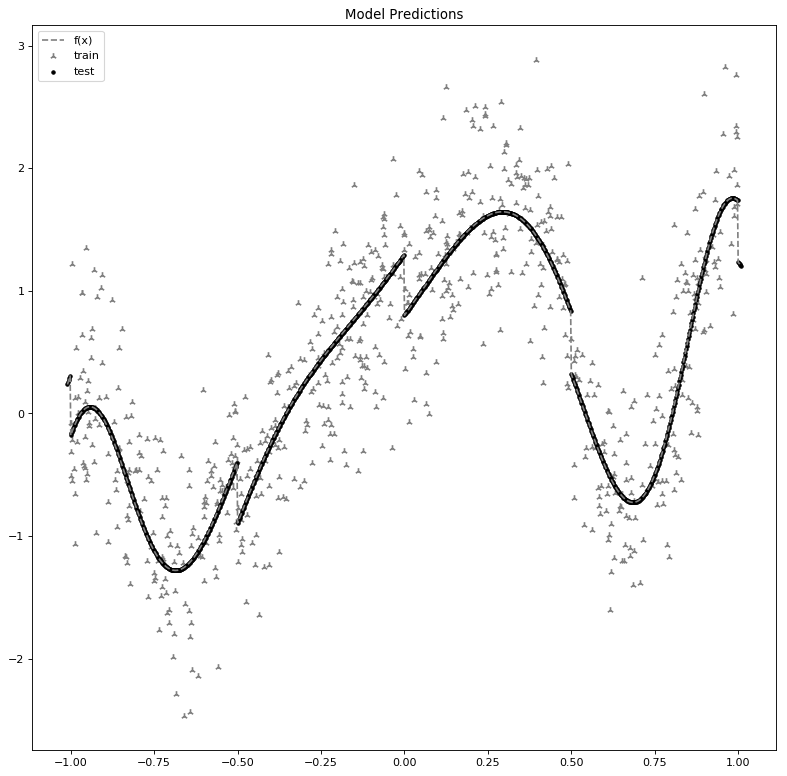

In [3]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
%run Data_Generator.ipynb

#### Prepare data for NEU

## 1) Get Basic Regression Models
 1. Get Base regression model (benchmark),
 2. Get Base regression model for NEU.

## Get basic regression model - Benchmark

In [4]:
if False:#os.path.exists('./outputs/models/Benchmarks/Linear_Regression/saved_model.pb'):
    #------------------#
    # Load Readout Map #
    #------------------#
    print('Benchmark model - already exists: Loading...')
    regression_Benchmark = tf.keras.models.load_model("./outputs/models/Benchmarks/Linear_Regression/")
    print('Benchmark model - already exists: Loaded.')
else:
    print('Pre-trained benchmark model does not exist: Training.')
    tf.random.set_seed(2020)
    ffNN_y_hat_train,ffNN_y_hat_test = build_ffNN(n_folds =2, 
                                                 n_jobs = 3, 
                                                 n_iter = 1, 
                                                 param_grid_in = param_grid_Vanilla_Nets, 
                                                 X_train = data_x, 
                                                 y_train = data_y,
                                                 X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   34.9s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   34.9s finished


Epoch 1/400
47/47 [==============================] - 0s 2ms/step - loss: 0.8105 - mse: 0.9886 - mae: 0.8105 - mape: 232.2135
Epoch 2/400
47/47 [==============================] - 0s 2ms/step - loss: 0.7726 - mse: 0.8978 - mae: 0.7726 - mape: 220.4018
Epoch 3/400
47/47 [==============================] - 0s 2ms/step - loss: 0.7527 - mse: 0.8728 - mae: 0.7527 - mape: 338.3097
Epoch 4/400
47/47 [==============================] - 0s 3ms/step - loss: 0.7428 - mse: 0.8658 - mae: 0.7428 - mape: 328.8851
Epoch 5/400
47/47 [==============================] - 0s 2ms/step - loss: 0.7285 - mse: 0.8125 - mae: 0.7285 - mape: 331.2487
Epoch 6/400
47/47 [==============================] - 0s 2ms/step - loss: 0.6634 - mse: 0.7153 - mae: 0.6634 - mape: 393.2917
Epoch 7/400
47/47 [==============================] - 0s 2ms/step - loss: 0.5955 - mse: 0.5771 - mae: 0.5955 - mape: 363.5450
Epoch 8/400
47/47 [==============================] - 0s 3ms/step - loss: 0.5943 - mse: 0.5717 - mae: 0.5943 - mape: 339.1153


47/47 [==============================] - 0s 3ms/step - loss: 0.4280 - mse: 0.2983 - mae: 0.4280 - mape: 250.0320
Epoch 67/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4359 - mse: 0.3066 - mae: 0.4359 - mape: 274.1404
Epoch 68/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4233 - mse: 0.2905 - mae: 0.4233 - mape: 332.5685
Epoch 69/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4220 - mse: 0.2849 - mae: 0.4220 - mape: 284.7198
Epoch 70/400
47/47 [==============================] - 0s 3ms/step - loss: 0.4199 - mse: 0.2826 - mae: 0.4199 - mape: 305.1878
Epoch 71/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4270 - mse: 0.2888 - mae: 0.4270 - mape: 319.6503
Epoch 72/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4340 - mse: 0.2984 - mae: 0.4340 - mape: 328.3557
Epoch 73/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4247 - mse: 0.2862 - mae: 0.4247 - mape: 325.4163
Epoch

47/47 [==============================] - 0s 4ms/step - loss: 0.4255 - mse: 0.2841 - mae: 0.4255 - mape: 319.3961
Epoch 131/400
47/47 [==============================] - 0s 3ms/step - loss: 0.4242 - mse: 0.2863 - mae: 0.4242 - mape: 304.7851
Epoch 132/400
47/47 [==============================] - 0s 3ms/step - loss: 0.4231 - mse: 0.2852 - mae: 0.4231 - mape: 288.1078
Epoch 133/400
47/47 [==============================] - 0s 5ms/step - loss: 0.4244 - mse: 0.2913 - mae: 0.4244 - mape: 302.5289
Epoch 134/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4205 - mse: 0.2853 - mae: 0.4205 - mape: 280.2066
Epoch 135/400
47/47 [==============================] - 0s 5ms/step - loss: 0.4196 - mse: 0.2846 - mae: 0.4196 - mape: 297.1272
Epoch 136/400
47/47 [==============================] - 0s 5ms/step - loss: 0.4251 - mse: 0.2854 - mae: 0.4251 - mape: 323.6691
Epoch 137/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4284 - mse: 0.2943 - mae: 0.4284 - mape: 311.506

47/47 [==============================] - 0s 3ms/step - loss: 0.4207 - mse: 0.2803 - mae: 0.4207 - mape: 283.4992
Epoch 195/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4183 - mse: 0.2765 - mae: 0.4183 - mape: 304.5432
Epoch 196/400
47/47 [==============================] - 0s 3ms/step - loss: 0.4194 - mse: 0.2838 - mae: 0.4194 - mape: 306.3417
Epoch 197/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4217 - mse: 0.2862 - mae: 0.4217 - mape: 299.6889
Epoch 198/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4206 - mse: 0.2816 - mae: 0.4206 - mape: 307.8292
Epoch 199/400
47/47 [==============================] - 0s 3ms/step - loss: 0.4264 - mse: 0.2890 - mae: 0.4264 - mape: 300.8282
Epoch 200/400
47/47 [==============================] - 0s 3ms/step - loss: 0.4195 - mse: 0.2856 - mae: 0.4195 - mape: 293.3694
Epoch 201/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4196 - mse: 0.2828 - mae: 0.4196 - mape: 303.692

47/47 [==============================] - 0s 3ms/step - loss: 0.4142 - mse: 0.2767 - mae: 0.4142 - mape: 301.8550
Epoch 259/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4259 - mse: 0.2929 - mae: 0.4259 - mape: 327.0633
Epoch 260/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4151 - mse: 0.2787 - mae: 0.4151 - mape: 296.1011
Epoch 261/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4228 - mse: 0.2827 - mae: 0.4228 - mape: 283.9907
Epoch 262/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4195 - mse: 0.2888 - mae: 0.4195 - mape: 327.0488
Epoch 263/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4260 - mse: 0.2927 - mae: 0.4260 - mape: 297.6792
Epoch 264/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4147 - mse: 0.2761 - mae: 0.4147 - mape: 308.8073
Epoch 265/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4156 - mse: 0.2820 - mae: 0.4156 - mape: 301.404

47/47 [==============================] - 0s 3ms/step - loss: 0.4125 - mse: 0.2744 - mae: 0.4125 - mape: 301.4532
Epoch 323/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4128 - mse: 0.2724 - mae: 0.4128 - mape: 303.5187
Epoch 324/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4225 - mse: 0.2881 - mae: 0.4225 - mape: 296.0330
Epoch 325/400
47/47 [==============================] - 0s 3ms/step - loss: 0.4154 - mse: 0.2783 - mae: 0.4154 - mape: 295.8372
Epoch 326/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4139 - mse: 0.2799 - mae: 0.4139 - mape: 308.2774
Epoch 327/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4229 - mse: 0.2851 - mae: 0.4229 - mape: 283.2229
Epoch 328/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4134 - mse: 0.2786 - mae: 0.4134 - mape: 301.3064
Epoch 329/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4193 - mse: 0.2833 - mae: 0.4193 - mape: 287.703

47/47 [==============================] - 0s 2ms/step - loss: 0.4139 - mse: 0.2810 - mae: 0.4139 - mape: 303.3168
Epoch 387/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4175 - mse: 0.2835 - mae: 0.4175 - mape: 303.8510
Epoch 388/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4156 - mse: 0.2796 - mae: 0.4156 - mape: 288.2173
Epoch 389/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4209 - mse: 0.2804 - mae: 0.4209 - mape: 306.8805
Epoch 390/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4178 - mse: 0.2882 - mae: 0.4178 - mape: 272.4939
Epoch 391/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4173 - mse: 0.2806 - mae: 0.4173 - mape: 305.6475
Epoch 392/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4148 - mse: 0.2786 - mae: 0.4148 - mape: 299.7516
Epoch 393/400
47/47 [==============================] - 0s 2ms/step - loss: 0.4129 - mse: 0.2745 - mae: 0.4129 - mape: 293.028

# Train NEU-ffNN

In [ ]:
tf.random.set_seed(2020)
print('Pre-trained benchmark model does not exist: Training.')
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN(n_folds =2, 
                                                          n_jobs = 3, 
                                                          n_iter = 1, 
                                                          param_grid_in = param_grid_NEU_Nets, 
                                                          X_train = data_x, 
                                                          y_train = data_y,
                                                          X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   51.3s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   51.3s finished


Epoch 1/400
47/47 [==============================] - 0s 5ms/step - loss: 0.8233 - mse: 1.0101 - mae: 0.8218 - mape: 227.1337
Epoch 2/400
47/47 [==============================] - 0s 4ms/step - loss: 0.7803 - mse: 0.9106 - mae: 0.7789 - mape: 205.9233
Epoch 3/400
47/47 [==============================] - 0s 4ms/step - loss: 0.7390 - mse: 0.8482 - mae: 0.7376 - mape: 323.3219
Epoch 4/400
47/47 [==============================] - 0s 4ms/step - loss: 0.6444 - mse: 0.6682 - mae: 0.6431 - mape: 389.2848
Epoch 5/400
47/47 [==============================] - 0s 4ms/step - loss: 0.6113 - mse: 0.6022 - mae: 0.6102 - mape: 354.9987
Epoch 6/400
47/47 [==============================] - 0s 4ms/step - loss: 0.6014 - mse: 0.5918 - mae: 0.6003 - mape: 370.7891
Epoch 7/400
47/47 [==============================] - 0s 4ms/step - loss: 0.6125 - mse: 0.6018 - mae: 0.6114 - mape: 365.5131
Epoch 8/400
47/47 [==============================] - 0s 5ms/step - loss: 0.6051 - mse: 0.5937 - mae: 0.6040 - mape: 358.7299


47/47 [==============================] - 0s 4ms/step - loss: 0.4236 - mse: 0.2948 - mae: 0.4230 - mape: 273.2984
Epoch 67/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4343 - mse: 0.3035 - mae: 0.4338 - mape: 318.0788
Epoch 68/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4198 - mse: 0.2865 - mae: 0.4193 - mape: 346.1737
Epoch 69/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4211 - mse: 0.2804 - mae: 0.4206 - mape: 292.2968
Epoch 70/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4242 - mse: 0.2873 - mae: 0.4237 - mape: 305.6755
Epoch 71/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4299 - mse: 0.2957 - mae: 0.4294 - mape: 308.3484
Epoch 72/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4240 - mse: 0.2864 - mae: 0.4235 - mape: 308.1468
Epoch 73/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4266 - mse: 0.2892 - mae: 0.4260 - mape: 332.3222
Epoch

47/47 [==============================] - 0s 4ms/step - loss: 0.4117 - mse: 0.2722 - mae: 0.4113 - mape: 289.7609
Epoch 131/400
47/47 [==============================] - 0s 5ms/step - loss: 0.4263 - mse: 0.2909 - mae: 0.4258 - mape: 291.8992
Epoch 132/400
47/47 [==============================] - 0s 5ms/step - loss: 0.4182 - mse: 0.2812 - mae: 0.4177 - mape: 288.2992
Epoch 133/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4130 - mse: 0.2771 - mae: 0.4125 - mape: 303.2902
Epoch 134/400
47/47 [==============================] - 0s 3ms/step - loss: 0.4166 - mse: 0.2835 - mae: 0.4160 - mape: 275.0105
Epoch 135/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4147 - mse: 0.2783 - mae: 0.4142 - mape: 280.6113
Epoch 136/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4215 - mse: 0.2865 - mae: 0.4210 - mape: 320.0406
Epoch 137/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4161 - mse: 0.2839 - mae: 0.4156 - mape: 296.764

47/47 [==============================] - 0s 4ms/step - loss: 0.4231 - mse: 0.2854 - mae: 0.4226 - mape: 277.7067
Epoch 195/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4148 - mse: 0.2783 - mae: 0.4143 - mape: 289.9193
Epoch 196/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4197 - mse: 0.2806 - mae: 0.4192 - mape: 290.9432
Epoch 197/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4183 - mse: 0.2787 - mae: 0.4178 - mape: 290.5567
Epoch 198/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4083 - mse: 0.2700 - mae: 0.4078 - mape: 298.2316
Epoch 199/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4156 - mse: 0.2781 - mae: 0.4151 - mape: 277.5118
Epoch 200/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4103 - mse: 0.2708 - mae: 0.4098 - mape: 298.9518
Epoch 201/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4116 - mse: 0.2692 - mae: 0.4111 - mape: 296.441

47/47 [==============================] - 0s 4ms/step - loss: 0.4127 - mse: 0.2751 - mae: 0.4122 - mape: 291.6102
Epoch 259/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4138 - mse: 0.2788 - mae: 0.4133 - mape: 321.4278
Epoch 260/400
47/47 [==============================] - 0s 3ms/step - loss: 0.4074 - mse: 0.2659 - mae: 0.4069 - mape: 292.7875
Epoch 261/400
47/47 [==============================] - 0s 3ms/step - loss: 0.4152 - mse: 0.2769 - mae: 0.4147 - mape: 279.3620
Epoch 262/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4079 - mse: 0.2693 - mae: 0.4074 - mape: 293.8514
Epoch 263/400
47/47 [==============================] - 0s 3ms/step - loss: 0.4126 - mse: 0.2816 - mae: 0.4121 - mape: 300.7653
Epoch 264/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4137 - mse: 0.2727 - mae: 0.4132 - mape: 285.8352
Epoch 265/400
47/47 [==============================] - 0s 4ms/step - loss: 0.4140 - mse: 0.2818 - mae: 0.4134 - mape: 291.930

### Generate Plots - Visualization

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y.reshape(-1,),color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test.reshape(-1,),color='black',label='test', marker = '.')


# Plot Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),ffNN_y_hat_test, color = 'red', label='DNN')
# Plot NEU Regressors
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test, color = 'blue',label='DNN_NEU')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Training - Set Predictions")
plt.show()

---
---
---

# Benchmark Models

Run univariate regression benchmarks file:

In [ ]:
# Run Univariate Regression File #
#--------------------------------#
%run Univariate_Regression_Benchmark_Models.ipynb

# Visualize Predictions

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

# Plot Benchmark(s)
#------------------#
# Plot Univariate Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),f_hat_smoothing_splines_test,color='pink',label='Splines')
plt.plot(np.array(data_x_test).reshape(-1,),LOESS_prediction_test,color='purple',label='LOESS')

# Plot Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),ffNN_y_hat_test, color = 'red', label='DNN')
# Plot NEU Regressors
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test, color = 'blue',label='DNN_NEU')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")
plt.show()

 ---

## Performance Report

In [ ]:
#--------------------#
# Classical Model(s) #
#--------------------#

# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

In [ ]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))

#### The END

---